# Flight Price Prediction

In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_excel('Flight_Data_Train.xlsx')

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test = pd.read_excel('Flight_Test_set.xlsx')

In [5]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [8]:
# percentage of missing values in the dataframe
df_train.isna().mean()*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [9]:
# percentage of missing values in the dataframe
df_test.isna().mean()*100

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
dtype: float64

In [10]:
# Merging both the test and train dataset
df = df_train.append(df_test)

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [12]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
# Converting Date OF Journey into Day, Date and Month of Journey
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df['weekday']= pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [14]:
df.drop(labels='Date_of_Journey', axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Journey_Day      13354 non-null  int64  
 11  Journey_Month    13354 non-null  int64  
 12  weekday          13354 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 1.4+ MB


In [16]:
#Converting the Duration into minutes

import re
df['Mintues'] = df.Duration.apply(lambda x: x[-3:-1])
df.Duration = df.Duration.apply(lambda x: int(re.findall('\d+',x[:2])[0])*60)
df.Duration = df.Mintues.astype('int') + df.Duration

In [17]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Mintues
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897.0,24,3,6,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662.0,1,5,2,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1159,2 stops,No info,13882.0,9,6,6,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218.0,12,5,6,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302.0,1,3,4,45


In [18]:
# Categorising the time into morning , evening, night , afternoon
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df['Dep_Time']=df['Dep_Time'].apply(deparrtime)
df['Arrival_Time']=df['Arrival_Time'].apply(deparrtime)

In [19]:
# Converting total_stops to 0,1,2,3 respectively
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        str(x).strip()
        stps=str(x).split(' ')[0]
        x=stps
    return x
df['Total_Stops']=df['Total_Stops'].apply(stops)



pd.options.mode.chained_assignment = None 
for i in range(df.shape[0]):
    if(df.iloc[i]['Additional_Info']=='No info'):
        df.iloc[i]['Additional_Info']='No Info'

In [20]:
# mapping the month number with their respective names.
df["Journey_Month"]=df["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"})

In [21]:
# Dropping Redundant Columns

df=df.drop(['Arrival_Time'], axis=1)
df=df.drop(labels='Mintues', axis=1)
df=df.drop(['Route'], axis=1)
df=df.drop('Additional_Info',1)

In [22]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,170,0,3897.0,24,March,6
1,Air India,Kolkata,Banglore,Morning,445,2,7662.0,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,1159,2,13882.0,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,325,1,6218.0,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,285,1,13302.0,1,March,4


In [23]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Dep_Time            0
Duration            0
Total_Stops         0
Price            2671
Journey_Day         0
Journey_Month       0
weekday             0
dtype: int64

# EDA 

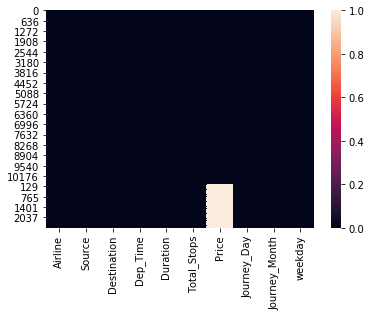

In [24]:
# Plotting missing values
sns.heatmap(df.isnull())

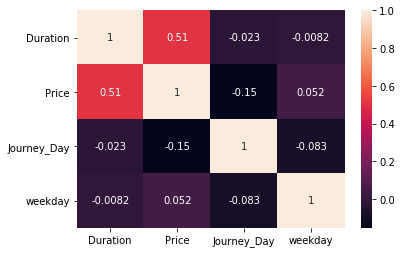

In [25]:
# Plotting the correlation
sns.heatmap(df.corr(),annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

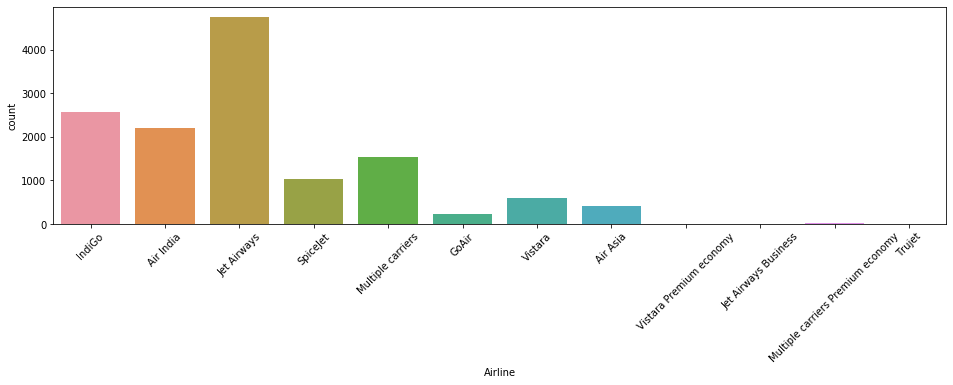

In [26]:
plt.figure(figsize=(16,4))
sns.countplot(df.Airline)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

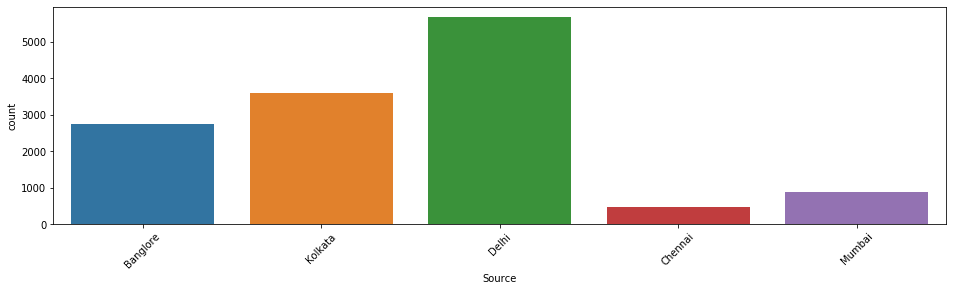

In [27]:
plt.figure(figsize=(16,4))
sns.countplot(df.Source)
plt.xticks(rotation=45)

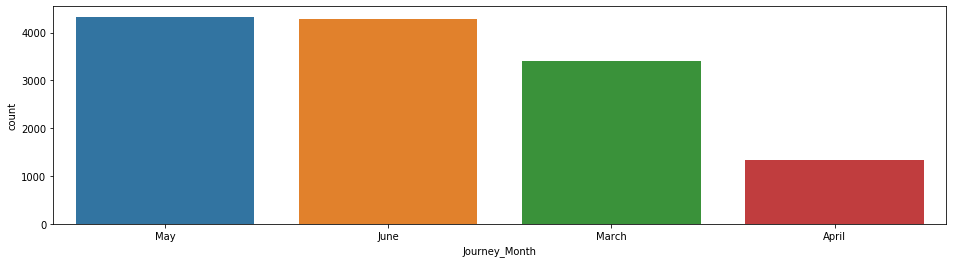

In [28]:
plt.figure(figsize=(16,4))
sns.countplot(df.Journey_Month,order=df.Journey_Month.value_counts().index)

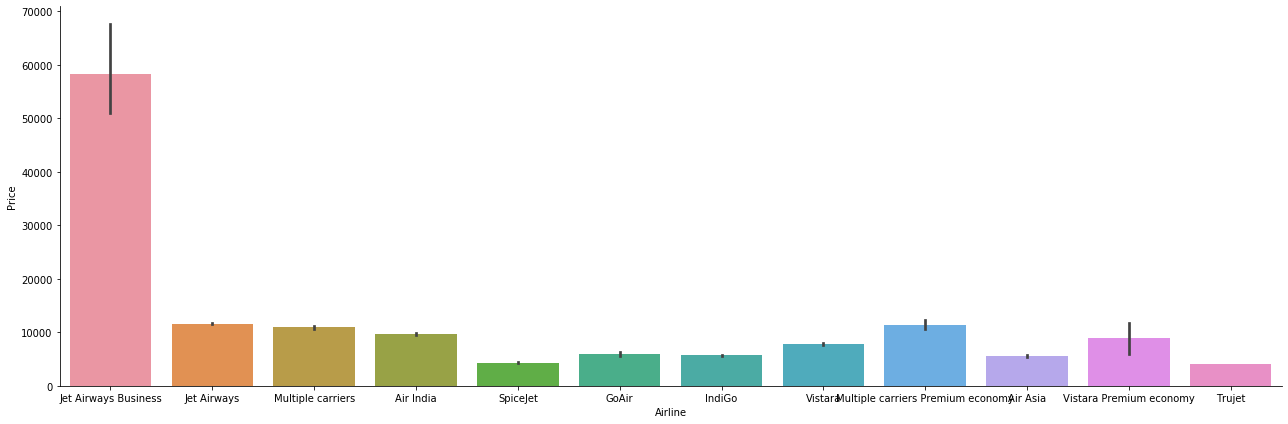

In [29]:
# AIRLINE vs PRICE
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

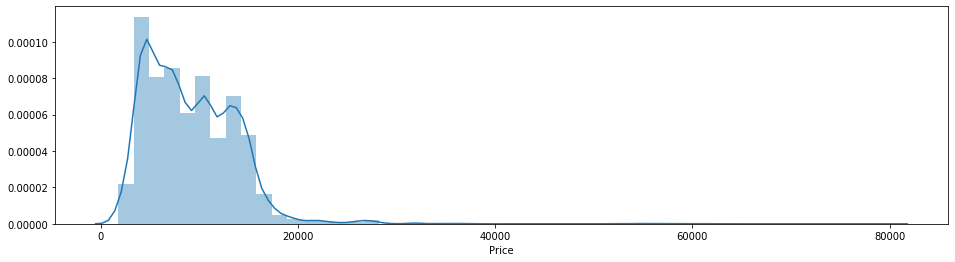

In [30]:
# Looking at Price distribution
plt.figure(figsize=(16,4))
sns.distplot(df['Price'])
plt.show()

In [31]:
df.groupby(['Journey_Month']).mean()

,Duration,Price,Journey_Day,weekday
Journey_Month,,,,
April,380.868124,5770.847081,11.004521,2.202713
June,650.598927,8828.796134,12.178021,3.055063
March,689.081184,10673.205580,13.775791,3.514361
May,681.210672,9127.247548,15.016632,2.592285


In [32]:
df.groupby(['weekday']).mean()

,Duration,Price,Journey_Day
weekday,,,
0,616.146077,8499.530811,13.653663
1,654.521375,9026.149597,17.436803
2,686.256009,9277.514190,12.080122
3,700.318441,8931.379367,14.586071
4,470.275647,9717.996700,14.067797
5,636.006676,8972.905389,12.087744
6,654.343970,9525.508820,12.150892


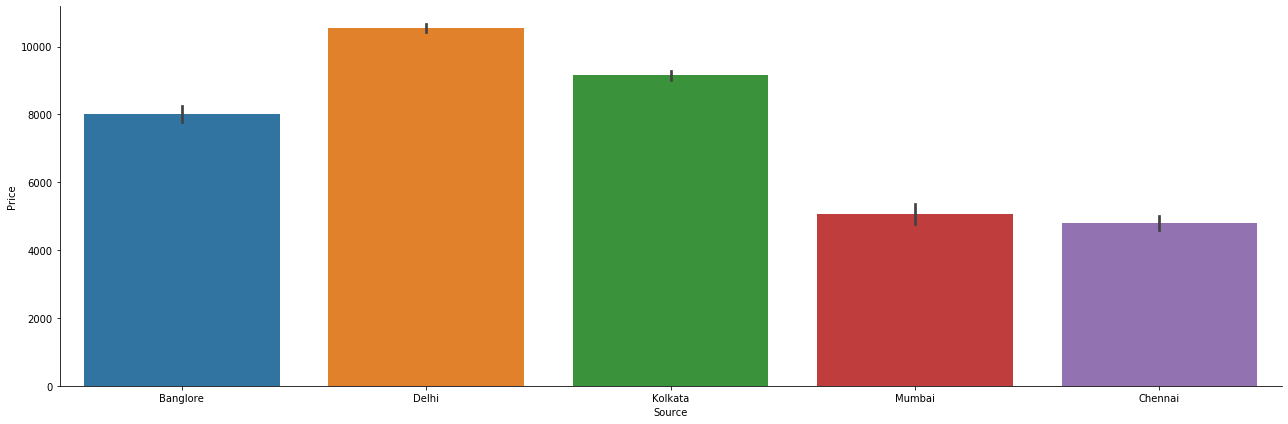

In [33]:
# Source vs PRICE
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

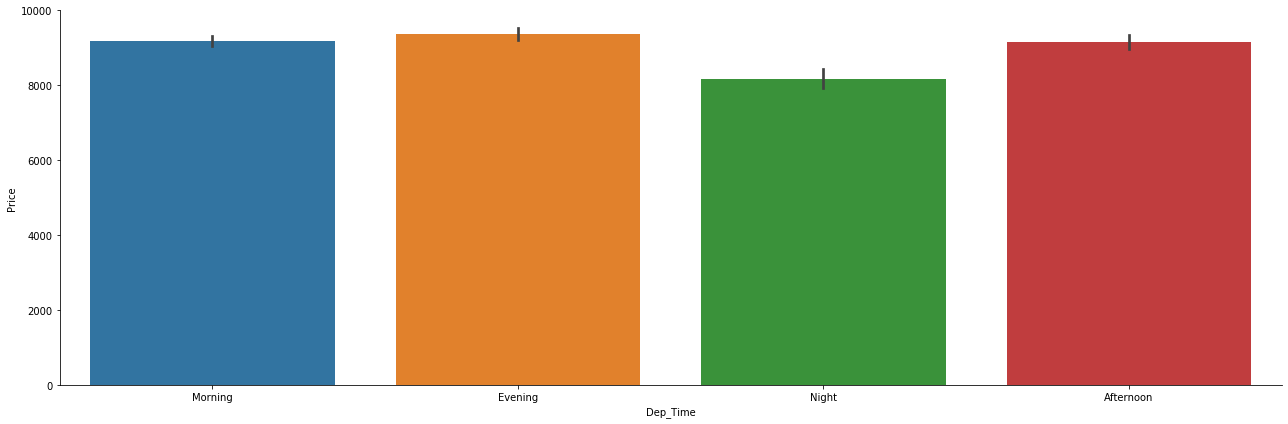

In [34]:
# Destination vs PRICE
sns.catplot(y='Price',x='Dep_Time',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

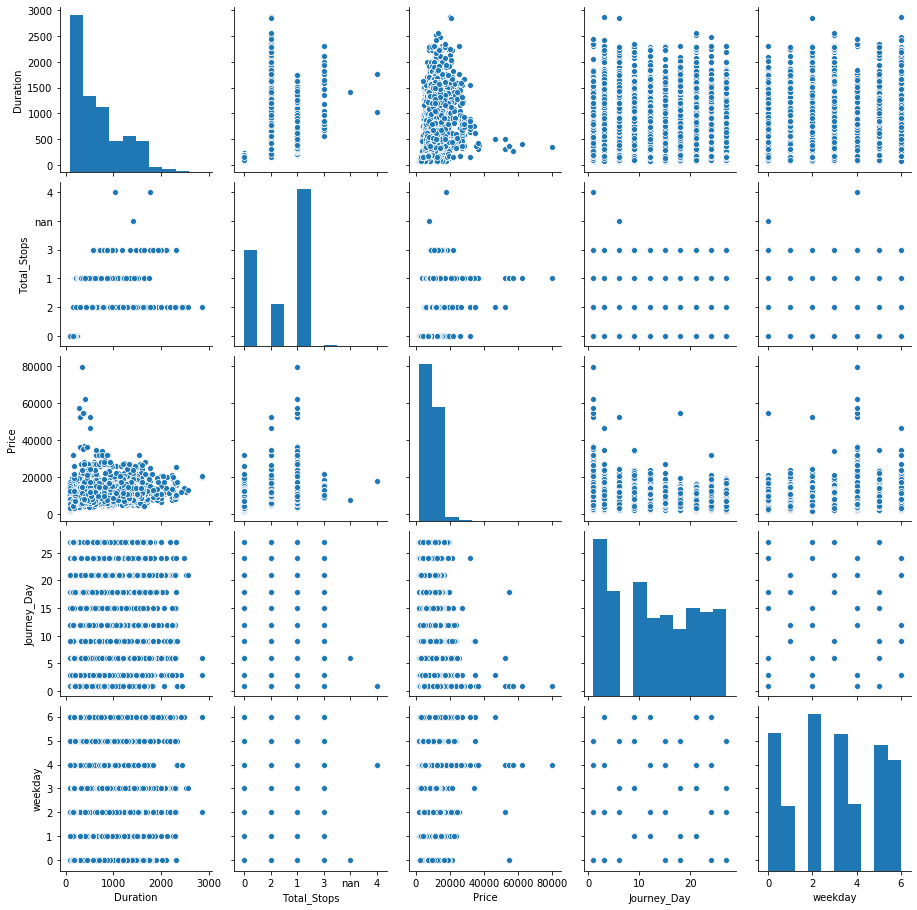

In [35]:
sns.pairplot(df)

# Data Processing

In [36]:
df_copy = df.copy()

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [38]:
# convert rest of categorical variable into dummy
df_copy = pd.get_dummies(df_copy, drop_first=True)

In [39]:
df.shape

(13354, 10)

In [40]:
df_copy.shape

(13354, 35)

In [41]:
df_copy_train = df_copy[~df_copy.Price.isna()]

In [42]:
df_copy_test = df_copy[df_copy.Price.isna()]

In [43]:
df_copy_train.shape

(10683, 35)

In [44]:
df_copy_test.shape

(2671, 35)

In [45]:
num_var = df_copy_train.select_dtypes(include= ['int64','float64']).keys()

In [46]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df_train, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

******* Duration *******


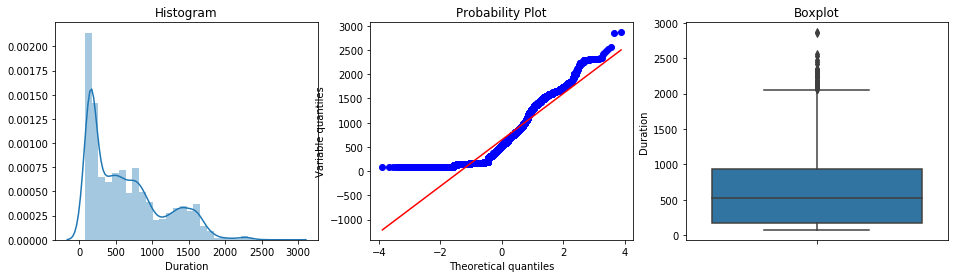

******* Price *******


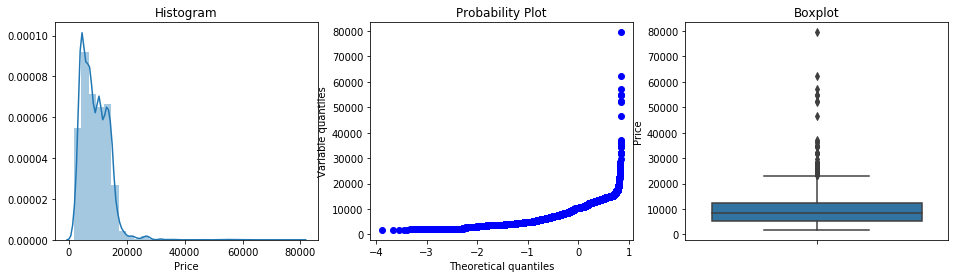

******* Journey_Day *******


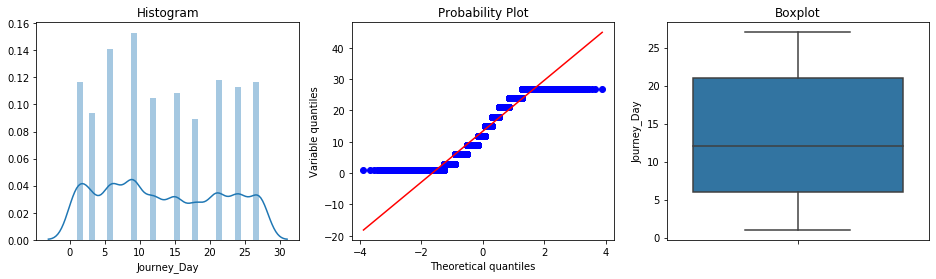

******* weekday *******


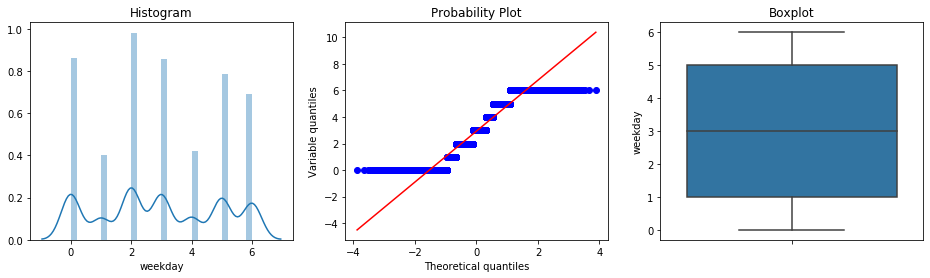

In [47]:
#  Checking the outliers
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df_copy, var)

  # here we observe outlier using histogram,, qq plot and boxplot 

In [48]:
# Addressing the outliers
import scipy.stats as stats
z_scores = stats.zscore(df_copy_train[num_var])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_copy_train = df_copy_train[filtered_entries]

In [49]:
df_copy_train.shape

(10528, 35)

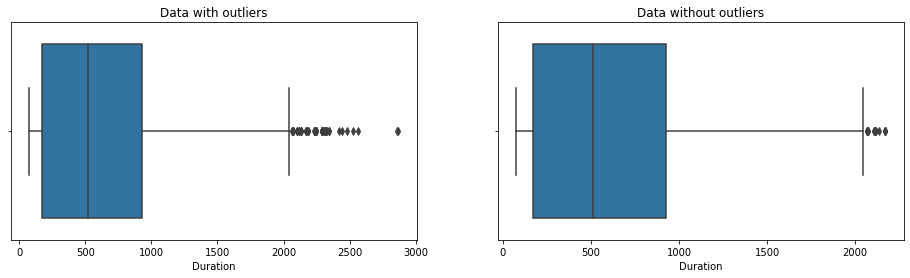

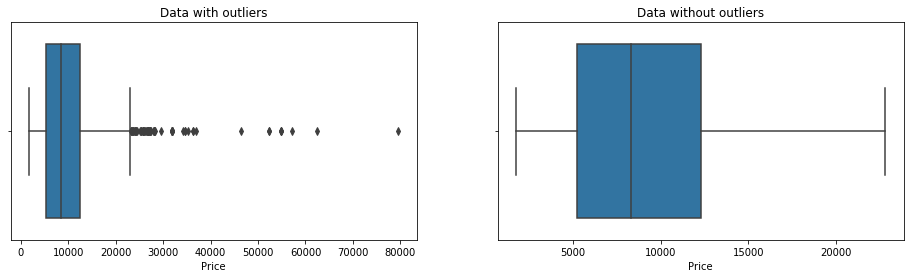

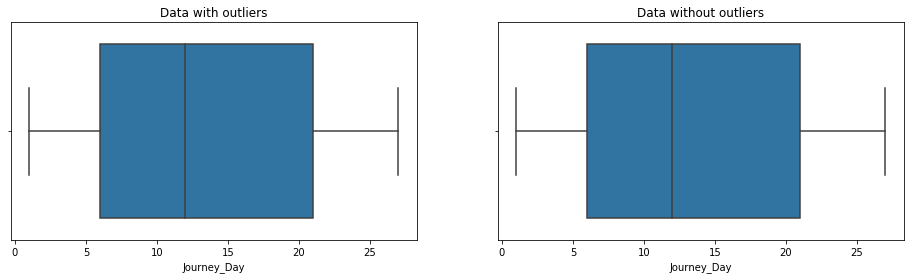

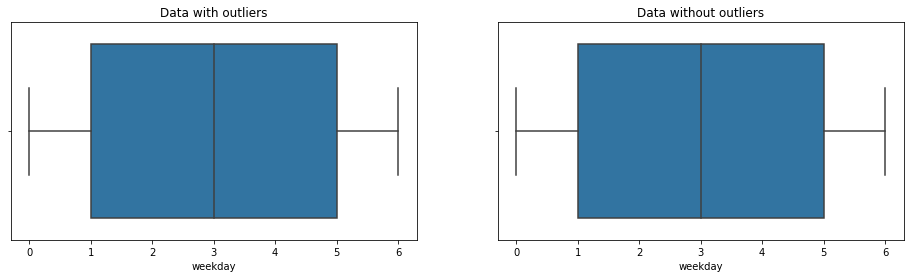

In [50]:
# before and after removing the outliers
for col in num_var:
    fig = plt.figure(figsize=(16, 4))
    
    fig.add_subplot(121)
    sns.boxplot(df_copy[col])
    plt.title('Data with outliers')
    
    fig.add_subplot(122)
    sns.boxplot(df_copy_train[col])
    plt.title('Data without outliers')

In [51]:
# Checking the skewness 
df_copy_train[num_var].skew()

Duration       0.782216
Price          0.413039
Journey_Day    0.109996
weekday        0.050265
dtype: float64

In [52]:
# Treating the skewness using Sqrt Transformation
np.sqrt(df_copy_train[num_var]).skew()

Duration       0.315005
Price          0.036444
Journey_Day   -0.399847
weekday       -0.793842
dtype: float64

In [53]:
# Treating the skewness using Sqrt Transformation
np.log1p(df_copy_train[num_var]).skew()

Duration      -0.163997
Price         -0.378150
Journey_Day   -0.877395
weekday       -0.730191
dtype: float64

In [54]:
# Finalysing the Sqrt Transformation 
df_impute = np.sqrt(df_copy_train)

In [55]:
df_impute.head()

,Duration,Price,Journey_Day,weekday,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Dep_Time_Morning,Dep_Time_Night,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Total_Stops_nan,Journey_Month_June,Journey_Month_March,Journey_Month_May
0,13.038405,62.425956,4.898979,2.449490,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21.095023,87.532851,1.000000,1.414214,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,34.044089,117.821899,3.000000,2.449490,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,18.027756,78.854296,3.464102,2.449490,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,16.881943,115.334297,1.000000,2.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
df_impute_col = list(df_impute.columns)
df_impute_col.remove('Price')
for col in df_impute_col:
    df_impute[col] = df_impute[col].astype(float)
    df_impute[[col]] = scaler.fit_transform(df_impute[[col]])

In [57]:
# Splitting the target variable
x = df_impute.drop('Price',1)
y = df_impute['Price']

In [58]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=0)
print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (8422, 34)
Shape of y_train =  (8422,)
Shape of x_test =  (2106, 34)
Shape of y_test =  (2106,)


In [59]:
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [60]:
LR=LinearRegression(normalize=True)
LA=Lasso(alpha=0.1 , random_state= 75)
RI=Ridge(alpha=0.1 , random_state= 75)
EN=ElasticNet(alpha=0.1 , random_state= 75)
KNR=KNeighborsRegressor(n_neighbors= 4)
DTR=DecisionTreeRegressor(random_state= 65)
ABR=AdaBoostRegressor(random_state= 95)
RFR=RandomForestRegressor(random_state= 54)
GBR=GradientBoostingRegressor(learning_rate= 0.01, n_estimators= 100 ,random_state=65)
XGR=XGBRegressor(random_state = 61)

In [61]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [62]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:   
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)    
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)    
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y,scoring='r2').mean()    
    cvs.append(round(score,3))

In [63]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
print(result.sort_values(by = 'R2_score',ascending=True))

                       Model  R2_score  Mean_Squared_Error  Cross_val_score
8  GradientBoostingRegressor  0.582450             197.721     5.760000e-01
6          AdaBoostRegressor  0.685653             148.852     6.730000e-01
3                 ElasticNet  0.711896             136.425     7.080000e-01
1                      Lasso  0.715365             134.782     7.100000e-01
0           LinearRegression  0.717437             133.801    -7.444851e+22
2                      Ridge  0.717819             133.620     7.120000e-01
4      DecisionTreeRegressor  0.744729             120.877     7.300000e-01
5        KNeighborsRegressor  0.778853             104.719     7.830000e-01
7      RandomForestRegressor  0.825560              82.602     8.220000e-01
9               XGBRegressor  0.870690              61.232     8.630000e-01


In [64]:
# As we can see from above trials the best performance is given by XGBRegressor so it is the final model selected

In [65]:
best_model = XGBRegressor()

In [66]:
best_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [67]:
best_model.score(x_test,y_test)

0.8706897571334062

In [68]:
df_copy_test.head()

,Duration,Price,Journey_Day,weekday,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Dep_Time_Morning,Dep_Time_Night,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Total_Stops_nan,Journey_Month_June,Journey_Month_March,Journey_Month_May
0,655,NaN,6,3,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,244,NaN,12,6,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,1425,NaN,21,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,793,NaN,21,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
4,170,NaN,24,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [69]:
df_copy_test.drop('Price',1,inplace=True)

In [70]:
test_prediction = best_model.predict(df_copy_test)

In [71]:
# Saving the results into csv

In [72]:
pd.DataFrame(test_prediction,columns=['Price']).to_csv('Test_results')

In [73]:
# Saving the best model
import joblib
joblib.dump(best_model,'flight_price.pkl')

['flight_price.pkl']